In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Easy Level

### Easy 1:

Докажите, что $\forall n \in \mathbb{N}, \ \forall r \in (0; 1]$
$0 < x_0 < 1 \implies 0 < x_n < 1$

Докажем по индукции:
База: при $n = 0$ верно из условия
Переход: пусть для n = i верно, т.е. $0 < x_i < 1$. Тогда для n = i + 1:
$ r \in (0; 1],\; 0 < x_i < 1 \implies r \in (0; 1],\; -1 < - x_i < 0 \implies 0 < 1 - x_i < 1 \\
\implies 0 < r x_i (1 - x_i) < r x_i \leq x_i < 1 \implies 0 < x_{i+1} < 1 $
Cледовательно, по принципу математической индукции, утверждение верно для всех $n \in \mathbb{N}$.


### Easy 2:

Сделайте вывод: как параметр $r$ влияет на поведение функции зависимости $x_n$ от $x_{n-1}$? $\\$
Постройте эту функцию для нескольких различных значений $r$.

Функция $y = r x (1 - x)$ это порабола с ветвями,  направленными вниз. Параметр $r$ влияет на растяжение/сжатие вдоль оси ординат.


In [ ]:
def f(r: float, esp: float = 1e-4, start: float = 0, end: float = 1):
    x = start
    while x < end:
        x += esp
        y = r * x * (1 - x)
        yield x, y


r_values = [0.5, 1.0, 2.5, 3.5, 4.0]
plt.figure(figsize=(10, 6))
plt.title('График зависимости $x_{n}$ от $x_{n-1}$ для различных значений $r$')
for r in r_values:
    data = list(f(r))
    data = np.array(data)
    plt.plot(data[:, 0], data[:, 1], label=f'r = {r}')
plt.legend()

### Easy 3:

Для заданной вариантом функции $$
g(x_{n+1}) = r x_n (1 - x_n)(2 + x_n),\; r \in \left(0; \dfrac{27}{2(7\sqrt{7} - 10)}\right],\; N = 0
$$

1. Постройте графики зависимости $x_n$ от $x_{n-1}$ для нескольких различных значений $r$.

2. Сделайте вывод о сходстве или различии поведения логистического отображения и точечного отображения из вашего варианта. Предположите: чем могут быть вызваны сходства/различия?

Из графиков видно, что при $x \in \left[0; 1 \right]$ функция $g$ выпукла вверх, пресекает ось абсцисс в точках $x = 0$ и $x = 1$ как и функция $f$. Но максимум на интервале $\left(0; 1 \right)$ достигается при $x = \dfrac{\sqrt{7} - 1}{3}$, в то время как у функции $f$ максимум достигается при $x = 0.5$.

In [ ]:
def g(r: float, esp: float = 1e-4, start: float = 0, end: float = 1):
    x = start
    while x < end:
        x += esp
        y = r * x * (1 - x) * (2 + x)
        yield x, y


r_max = 27 / (2 * (7 * 7 ** 0.5 - 10))
r_values = [r_max / 4, r_max / 3, r_max / 2, r_max]
plt.figure(figsize=(10, 6))
plt.title('График зависимости $x_{n}$ от $x_{n-1}$ для различных значений $r$')
for r in r_values:
    data = np.array(list(g(r)))
    plt.plot(data[:, 0], data[:, 1], label=f'r = {r}')
plt.legend()

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('График f и g на отрезке [-2; 2]')
data_g = np.array(list(g(r_max, start=-2, end=2)))
plt.plot(data_g[:, 0], data_g[:, 1], label='$x_n = g(x_{n-1})$')
data_f = np.array(list(f(4, start=-2, end=2)))
plt.plot(data_f[:, 0], data_f[:, 1], label='$x_n = f(x_{n-1})$')
plt.legend()

Из графиков видимо, что функции $f$ и $g$ имеют различное поведение вне отрезка $\left[0; 1 \right]$. Функция $g$ это кубическая парабола, с двумя точками экстремума, в то время как функция $f$ это квадратичная парабола с одним экстремумом. Такое различие может быть вызвано степенью многочлена, задающего отображение.

## Normal Level

#### Normal 1

1. Найдите все неподвижные точки логистического отображения $x_{n+1} = r x_n (1 - x_n)$.
2. При каких $r$ отображение имеет одну неподвижную точку? Несколько?
3. Какое максимальное количество неподвижных точек может иметь логистическое отображение? Почему?

In [ ]:
def linear_func(r: float = 1, esp: float = 1e-4, start: float = 0, end: float = 1):
    x = start
    while x < end:
        x += esp
        y = r * x
        yield x, y


r_values = [0.1, 1, 2, 3, 4]
plt.figure(figsize=(10, 6))
plt.title('График зависимости $x_{n}$ от $x_{n-1}$ для различных значений $r$')
start = 0
end = 1
for r in r_values:
    data = np.array(list(f(r, start=start, end=end)))
    plt.plot(data[:, 0], data[:, 1], label=f'r = {r}')
data_linear = np.array(list(linear_func(start=start, end=end)))
plt.plot(data_linear[:, 0], data_linear[:, 1], label='$y = x$')
plt.legend()

Неподвижная точка имеет вид $x^* = f(x^*) \implies$ она лежит на прямой $y = x$.  Из графика видно, что при $r \in \left(0, 1 \right]$ пересечений нет, при $r \in (1, 4]$ графики пересекаются в одной точке. <br>
Максимум одна неподвижная точка. Докажем аналитически: <br>
$x^* = r x^* (1 - x^*) \implies r x^{*2} - r x^* + x^* = 0 \implies x^* (r x^* - r + 1) = 0 \implies \left[
\begin{array}{l}
x^{*}=0 \notin (0,1]\\
x^{*}=\dfrac{r-1}{r}
\end{array}
\right. $ <br>
Таким образом, при $r \in (0, 1]$ неподвижная точек нет. При $r \in (1, +\infty)$ неподвижная точка одна $x^* = \dfrac{r - 1}{r}$. <br> чтд.


### Normal 2:

Докажите, что при $x_0 \in (0; 1)$ и $r \in (0; 1]$ последовательность $\{x_n\}$, заданная логистическим отображением, монотонно убывает. Существует ли предел у данной последовательности при $r \in (0; 1]$? Докажите. Покажите графически.

Докажем, что последовательность монотонно убывает:
$$ \forall r \in (0; 1]:\; 0 < x_i < 1 \implies  -1 < - x_i < 0 \implies 0 < 1 - x_i < 1 \\
\implies 0 < r x_i (1 - x_i) = x_{i+1} < r x_i \leq x_i \implies x_{i+1} < x_i$$ _чтд._


По теореме Вейерштрасса, так как последовательность ограничена снизу ($x_n > 0$) и монотонно убывает, то она имеет предел.

In [ ]:
def x_n(r: float, x0: float, n: int):
    seq = [x0]
    yield 1, seq[0]
    for x in range(2, n + 1):
        seq.append(r * seq[-1] * (1 - seq[-1]))
        yield x, seq[-1]


plt.figure(figsize=(10, 6))
plt.title('График зависимости $x_{n}$ от $n$ при $r = 0.5$ и $x_0 = 0.8$')
r_values = [0.5, 1.0]
x_values = [0.1, 0.5, 0.99]
for r in r_values:
    for x0 in x_values:
        data = np.array(list(x_n(r, x0, 500)))
        plt.plot(data[:, 0], data[:, 1], label=f'r = {r}, x0 = {x0}')
plt.legend()

### Normal 3:



Пусть $r \in (2; 3), \, x_{2n} > x^*, \, x_{2n+1} < x^*.$ Что вы можете сказать о монотонности подпоследовательностей$^a$ $\{x_{2n}\}, \, \{x_{2n+1}\}$? Докажите. Проверьте графически.

Аналогично, здесь идет речь о логистическом отображении.

$x^{*} = \dfrac{r - 1}{r}$ - неподвижная точка. <br>
$x_{2n} = r x_{2n-1} (1 - x_{2n-1}) > \dfrac{r-1}{r}$ <br>
Рассмотрим отображение $h(x) = f(f(x)) = r (r x (1 - x)) (1 - r x (1 - x))$ <br>
Найдем знак $h(x) - x$:
$h(x) - x = r^2 x (1 - x) (1 - r x (1 - x)) - x$
$f(x^{*}) = x^{*} \implies h(x^{*}) = x^{*} \implies h(x^{*}) - x^{*} =0 \implies (x - x^{*})$ делит многочлен $h(x) - x$. <br>
Разделим $h(x) - x$ на $(x - x^{*})$ (В столбик)<br>
Получаем факторизацию
$h(x)-x = -r x (x-x^{*})(r^{2}x^{2} - r^{2}x - r x + r + 1)$,
Обозначим
$ q(x) = r^{2}x^{2} - r^{2}x - r x + r + 1$. <br>
$D = (r^{2}+r)^{2} - 4r^{2}(r+1) = r^{2}(r-3)(r+1) < 0$ при $2<r<3$,
старший коэффициент $r^{2}>0$, значит $ q(x) > 0$ при всех $x$. <br>
Следовательно знак $h(x)-x$ определяется знаком $-(x-x^{*}) \implies$ при $x_{2n} > x^{*} $ $h(x_{2n}) - x_{2n} < 0 \implies x_{2n+2} < x_{2n}$, т.е. подпоследовательность $\{x_{2n}\}$ монотонно убывает. <br>
Аналогично, при $x_{2n+1} < x^{*} $ $h(x_{2n+1}) - x_{2n+1} > 0 \implies x_{2n+3} > x_{2n+1}$, т.е. подпоследовательность $\{x_{2n+1}\}$ монотонно возрастает. _чтд._

In [ ]:
r_values = [2, 2.5, 2.99]
x0 = 0.51
for r in r_values:
    plt.figure(figsize=(10, 6))
    plt.title(f'График зависимости $x_{{n}}$ от $n$ при r = {r} и x0 = {x0}')
    data = np.array(list(x_n(r, x0, 50 if r <= 2.7 else 600)))
    plt.plot(data[:, 0], data[:, 1], marker='o' if r <= 2.7 else '')
    plt.axhline(y=(r - 1) / r, color='k', linestyle='--', label='$x^{*}$', alpha=0.3)
    plt.legend()

### Normal 4:


Для отображения $g(x_{n+1}) = r x_n (1 - x_n)(2 + x_n),\; r \in \left(0; \dfrac{27}{2(7\sqrt{7} - 10)}\right]$:
1. Аналитически найдите неподвижную точку.
2. Найдите или оцените диапазон параметра $r$, при котором последовательность монотонно сходится к нулю.
3. Постройте графики зависимости $x_n$ от $n$ для нескольких различных значений параметра $r$.

$g(x^{*}) = x^{*} \implies r x^{*} (1 - x^{*}) (2 + x^{*}) = x^{*} \implies x^{*} (r (1 - x^{*}) (2 + x^{*}) - 1) = 0 \implies $ <br>$\implies \left[
\begin{array}{l}
x^{*} = 0 \\
r (1 - x^{*}) (2 + x^{*}) - 1 = 0 \implies \begin{cases}D = 9r^{2} - 4r>0 \implies r < \dfrac{9}{4} \\ \left[ \begin{array} xx^{*} = \dfrac{-r - \sqrt{D}}{2r} \notin (0,1) \\ x^{*} = \dfrac{-r + \sqrt{D}}{2r}\end{array} \right. \end{cases}
\end{array}
\right. \implies$<br>
$\implies \begin{cases} r < \dfrac{9}{4} \\
\dfrac{-r + \sqrt{9r^{2} - 4r}}{2r} > 0 \implies r > \dfrac{1}{2}\\
\dfrac{-r + \sqrt{9r^{2} - 4r}}{2r} < 1 (\text{верно т.к } \sqrt{9r^{2} - 4r} < 3r)
\end{cases} \implies  $<br>$\implies$ При $r \in (\dfrac{1}{2}, \dfrac{9}{4})$ есть неподвижная точка $x^{*} = \dfrac{-r + \sqrt{9r^{2} - 4r}}{2r}$. <br>

Далее исследуем сходимость к нулю.

Для $x\in(0,1)$: $(1-x)(2+x) = 2 - x - x^{2} \in (0,2) \implies$<br>
$\implies 0 < g(x) = r x (1-x)(2+x) < 2 r x$

При $r \in \left(0, \dfrac{1}{2} \right)$ $ \implies 0 < g(x) < x \implies$ последовательность монотонно убывает и ограничена снизу, следовательно сходится к нулю.



In [ ]:
def x_n_g(r: float, x0: float, n: int):
    seq = [x0]
    yield 1, seq[0]
    for x in range(2, n + 1):
        seq.append(r * seq[-1] * (1 - seq[-1]) * (2 + seq[-1]))
        yield x, seq[-1]


r_values = [r_max / 4, r_max / 3, r_max / 2, r_max]
x0 = 0.51
for r in r_values:
    plt.figure(figsize=(10, 6))
    plt.title(f'График зависимости $x_{{n}}$ от $n$ при r = {r} и x0 = {x0}')
    data = np.array(list(x_n_g(r, x0, 200)))
    plt.plot(data[:, 0], data[:, 1])
    if 1 / 2 < r < 9 / 4:
        x_star = (-r + (9 * r ** 2 - 4 * r) ** 0.5) / (2 * r)
        plt.axhline(y=x_star, color='k', linestyle='--', label='$x^{*}$', alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    plt.axhline(y=r_max, color='k', linestyle='--', alpha=0.3)
plt.legend()

## Hard Level

### Hard 1:
1. Положим $r_{\infty} \approx 3.5699456 \ldots$. Как изменяется длина цикла при $r \in (3; r_{\infty})?$
2. Для $r \in (3; r_{\infty})$ экспериментально установите, какие ограничения$^a$ действуют на $m?$

$^a$Здесь имеется в виду не ограниченность сверху или снизу, а то, какую закономерность можно выделить, исследовав изменение длины цикла $m$.

In [ ]:
r_infty = 3.5699456
EPS = 1e-12
r_data = []


def index_with_eps(seq: list[float], val: float, eps: float = EPS):
    for i in range(len(seq) - 1, max(len(seq) - 1025, -1), -1):
        if abs(seq[i] - val) <= eps:
            return i
    return None


for r in np.arange(3.0, r_infty, 1e-2):
    min_cycle_length = 100
    max_cycle_length = 1
    for x0 in np.arange(0.001, 1.0, 1e-1):
        seq = [float(x0)]
        for _ in range(10000):
            seq.append(r * seq[-1] * (1.0 - seq[-1]))
        cycle = []
        for i in range(max(1, len(seq) - 258), len(seq)):
            idx = index_with_eps(cycle, seq[i], EPS)
            if idx is not None:
                cycle_length = len(cycle) - idx
                min_cycle_length = min(min_cycle_length, cycle_length)
                max_cycle_length = max(max_cycle_length, cycle_length)
                break
            cycle.append(seq[i])
    min_cycle_length = min(min_cycle_length, max_cycle_length)
    r_data.append([float(r), float(min_cycle_length), float(max_cycle_length)])

plt.figure(figsize=(10, 6))
plt.title('Зависимость длины цикла от параметра r')
r_arr = np.array(r_data, dtype=np.float64)
plt.plot(r_arr[:, 0], r_arr[:, 1], label='Минимальная длина цикла')
plt.plot(r_arr[:, 0], r_arr[:, 2], label='Максимальная длина цикла')
for y in (1, 2, 4, 8, 16):
    plt.axhline(y=y, color='k', linestyle='--', alpha=0.3)
plt.xlabel('r')
plt.ylabel('Длина цикла m')
plt.legend()
plt.tight_layout()
plt.show()

Для подавляющего большинства значений $r$ в интервале $(3, r_{\infty})$  $m \in \{2^{n} | n \in \mathbb{N}\}$. Исключения составляют небольшое количество значений $r$, для которых $m$ принимает другие значения (например, 3, 6, 12).

### Hard 2:
1. Напишите функцию, которая для заданного параметра $r$ строит лестницу Ламерея.
2. Сделайте выводы: как выглядят циклы различных порядков на графике?

In [ ]:
def lamerey_stair(r: float, x0: float, n: int, esp: float = 1e-4, func: callable = f):
    seq = [x0]
    for x in range(1, n):
        if func == f:
            seq.append(r * seq[-1] * (1 - seq[-1]))
        else:
            seq.append(r * seq[-1] * (1 - seq[-1]) * (2 + seq[-1]))
    plt.figure(figsize=(10, 6))
    plt.title(f'Лестница Ламерея для r = {r}')
    data = np.array(list(func(r, esp=esp)))
    x = data[:, 0]
    y = data[:, 1]
    plt.plot(x, y, label='$x_{n} = f(x_{n-1})$')
    plt.plot(x, x, label='$y = x$', color='k', linestyle='--')
    plt.plot([seq[0], seq[0]], [0, seq[1]], color='r')
    plt.plot([seq[0], seq[1]], [seq[1], seq[1]], color='r')
    for i in range(1, len(seq) - 1):
        plt.plot([seq[i], seq[i]], [seq[i], seq[i + 1]], color='r')
        plt.plot([seq[i], seq[i + 1]], [seq[i + 1], seq[i + 1]], color='r')
    plt.xlim(0, 1)
    plt.ylim(0, max(max(y), 1))
    plt.legend()
    plt.show()


for r in [3, 3.1, 3.2, 3.3, r_infty]:
    lamerey_stair(r, 0.1, 5000)

Циклы различных порядков на графике выглядят как замкнутые траектории, состоящие из вертикальных и горизонтальных отрезков. Чем выше порядок цикла, тем большее в этой замкнутой траектории изломов.

### Hard 3:
Исследуйте: как изменяется длина цикла заданного вариантом отображения $g(x_n)$ с изменением параметра $r$? Постройте соответствующие графики. Есть ли сходства с логистическим отображением?

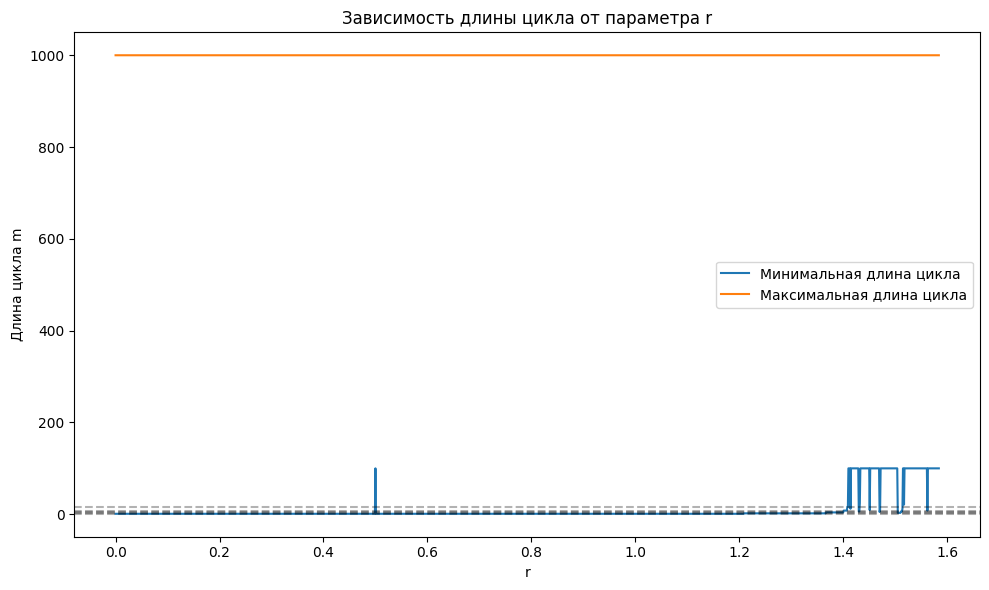

In [22]:
r_infty = 3.5699456
EPS = 1e-12
r_data = []
MAX_CYCLE_LENGTH = 1024


def index_with_eps(seq: list[float], val: float, eps: float = EPS):
    for i in range(len(seq) - 1, max(len(seq) - MAX_CYCLE_LENGTH - 1, -1), -1):
        if abs(seq[i] - val) <= eps:
            return i
    return None


for r in np.arange(0, r_max, 1e-3):
    min_cycle_length = 100
    max_cycle_length = 1000
    for x0 in np.arange(0.001, 1.0, 1e-2):
        seq = [float(x0)]
        for _ in range(10000):
            seq.append(r * seq[-1] * (1.0 - seq[-1]) * (2 + seq[-1]))
        cycle = []
        for i in range(max(len(seq) - MAX_CYCLE_LENGTH - 1, 1), len(seq)):
            idx = index_with_eps(cycle, seq[i], EPS)
            if idx is not None:
                cycle_length = len(cycle) - idx
                min_cycle_length = min(min_cycle_length, cycle_length)
                max_cycle_length = max(max_cycle_length, cycle_length)
                break
            cycle.append(seq[i])
    min_cycle_length = min(min_cycle_length, max_cycle_length)
    r_data.append([float(r), float(min_cycle_length), float(max_cycle_length)])

plt.figure(figsize=(10, 6))
plt.title('Зависимость длины цикла от параметра r')
r_arr = np.array(r_data, dtype=np.float64)
plt.plot(r_arr[:, 0], r_arr[:, 1], label='Минимальная длина цикла')
plt.plot(r_arr[:, 0], r_arr[:, 2], label='Максимальная длина цикла')
for y in (1, 2, 4, 8, 16):
    plt.axhline(y=y, color='k', linestyle='--', alpha=0.3)
plt.xlabel('r')
plt.ylabel('Длина цикла m')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
for r in [9 / 8, 9 / 8 + (r_max - 9 / 8) / 4, 9 / 8 + (r_max - 9 / 8) / 3, 9 / 8 + (r_max - 9 / 8) / 2, r_max]:
    lamerey_stair(r, 0.7, 5000, func=g)